**In this assignment, your goal is to implement and train a multi-layer perceptron (MLP) on the CIFAR- 10 dataset with data augmentation (Two hidden layers with 64 neurons each MLP model).**


 Ques 1 : **DownloadtheCIFAR-10dataset(https://www.cs.toronto.edu/~kriz/cifar.html).Hint: Use pickle library to load the dataset. [5 marks]**

In [1]:
#Functions to Unpack and Load the Data using Pickle

import pickle
import numpy as np
import math
import matplotlib.pyplot as plt

#Function for Unpacking Dataset using Pickle
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict


#Function for One Hot Encoding of Lables
def label_mat(Y):
  Y_onehot = np.copy(np.zeros((Y.shape[0],10)))
  for i in range(Y.shape[0]):
    k = np.copy(Y[i])
    #print(type(k),k)
    Y_onehot[i,k]=1
  return np.copy(Y_onehot)

In [2]:
#Unpacking Train Data
file = "/Users/hrushikesh_chunduri/Desktop/DLCV/data_batch_1"
db_1 = unpickle(file)

file = "/Users/hrushikesh_chunduri/Desktop/DLCV/data_batch_2"
db_2 = unpickle(file)

file = "/Users/hrushikesh_chunduri/Desktop/DLCV/data_batch_3"
db_3 = unpickle(file)

file = "/Users/hrushikesh_chunduri/Desktop/DLCV/data_batch_4"
db_4 = unpickle(file)

file = "/Users/hrushikesh_chunduri/Desktop/DLCV/data_batch_5"
db_5 = unpickle(file)

#Loading Train Data 
X_train = np.copy([db_1['data'], db_2['data'], db_3['data'], db_4['data'], db_5['data']])
X_train = np.copy(np.array(X_train))
X_train = np.copy(np.vstack(X_train))
print("Shape of Train Data:",X_train.shape)

#Loading Train Data Labels
Y_train = np.copy([db_1['labels'], db_2['labels'], db_3['labels'], db_4['labels'], db_5['labels']])
Y_train = np.copy(np.array(Y_train))
Y_train = np.copy(Y_train.reshape(-1))

#One Hot Encoding for Train Data Lables
Y_train = np.copy(label_mat(Y_train))

print("Shape of Lables for Train Data after One Hot Encoding:",Y_train.shape)

#Reshaping Train Data in Image Format
X_train = np.copy(X_train.reshape(len(X_train),3,32,32).transpose(0,2,3,1))

print("Shape of Image Format Train Data:", X_train.shape)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hrushikesh_chunduri/Desktop/DLCV/data_batch_1'

In [17]:
#Unpacking Test Data
file = "/Users/hrushikesh_chunduri/Desktop/DLCV/test_batch"
test = unpickle(file)

#Loading Test Data
X_test = np.copy(test['data'])
print("Shape of Test Data:",X_test.shape)

#Loading Test Data Labels
Y_test = np.copy(np.array(test['labels']))

#One Hot Encoding for Test Data Lables
Y_test = np.copy(label_mat(Y_test))
print("Shape of Lables for Test Data after One Hot Encoding:",Y_test.shape)

#Reshaping Test Data in Image Format
X_test = np.copy(X_test.reshape(len(X_test),3,32,32).transpose(0,2,3,1))
print("Shape of Image Format Test Data:", X_test.shape)

Shape of Test Data: (10000, 3072)
Shape of Lables for Test Data after One Hot Encoding: (10000, 10)
Shape of Image Format Test Data: (10000, 32, 32, 3)


**2. Implement the image transformation methods mentioned below: [5x4=20 marks]**

*Ques 2(a): Image Enhancement*

*Instruction for enhancing the image:*

*for each pixel i in the image x use the formula :((i-min)/(max-min))∗255*

*Here, min and max are the minimum and maximum pixel values in the image x.*

Example Image Before Enhancement AxesImage(54,36;334.8x217.44)


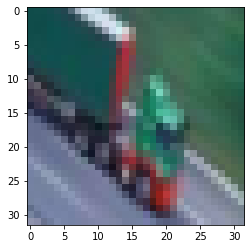

In [75]:
print("Example Image Before Enhancement",plt.imshow(X_train[50]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Example Image After Enhancement AxesImage(54,36;334.8x217.44)


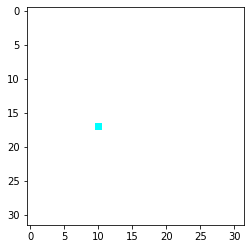

In [76]:
#Function to implement Image Enhancement
def IE(image):
    min_val = np.min(image)
    max_val = np.max(image)
    image = ((image-min_val) / (max_val-min_val) * 255)
    return image
print("Example Image After Enhancement",plt.imshow(IE(X_train[50])))

*2(b): Posterization of Image (A posterizing image is the one in which you reduce the number of colors in the image to provide a visual art).*

*Follow the instructions below to posterize the image:*

*Select a desired minimum and maximum pixel value in the range of [0-255].*

*Now, for each pixel i in image x:*

    i. Calculate the range r by subtracting selected minimum and maximum pixel value
    
    ii: Get a Divider for the colors using divider = 255/r
    
    iii: Get the level of colors by i = i/divider
    
    iv: Finally, Apply the Color Palette on the pixel by i = i + min
    
 *Make sure, the final image x should have the pixel values in the range of [0,255]*   
    

In [86]:
# Function for Posterization of Image
def PoI(image):  
    return image

                    

*2(c) Random Rotate [-180◦, 180◦].*

Image before Rotation AxesImage(54,36;334.8x217.44)


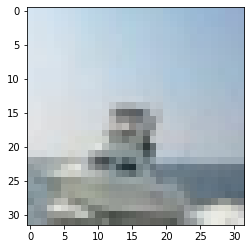

In [73]:
print("Image before Rotation",plt.imshow(X_train[100]))

Image after Rotation AxesImage(54,36;334.8x217.44)


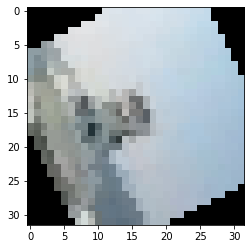

In [74]:
#Function for Random Rotation of Image
def Rotate(image):
  rotate = np.random.randint(-180,180)
  Rdn = math.radians(rotate)
  image_n = np.copy(np.uint8(np.zeros(image.shape)))
  Ht,Wt = (image_n.shape[0],image_n.shape[1])
  Cx,Cy = (Wt//2,Ht//2)

  for i in range(image_n.shape[0]):
    for j in range(image_n.shape[1]):
      a = (i-Cx)*math.cos(Rdn)+(j-Cy)*math.sin(Rdn)
      b = -(i-Cx)*math.sin(Rdn)+(j-Cy)*math.cos(Rdn)
        
      a= round(a)+Cx
      b= round(b)+Cy

      if(a>=0 and b>=0 and a<image.shape[0] and b<image.shape[1]):
        image_n[i,j,:] = image[a,b,:]

  return image_n

print("Image after Rotation",plt.imshow(Rotate(X_train[100])))

*2(d) Contrast & Horizontal flipping. (First, change the contrast of the image with a factor of
α randomly selected from the range (0.5, 2.0) and then flip the image horizontally with a
probability of 0.5)*

*Instructions for changing contrast of an image:*

*Given an image x with pixel values in range [0, 255], you can change its contrast by a factor
of α using the following steps:*

*i:Change all the pixel values with formula x ′ (i, j, c) = α ·(x (i, j, c) − 128) + 128. 
Here, x(i, j, c) refers to the c-th channel value of the (i, j)-th pixel.*

*ii: Clip the pixel values in x ′ so that the final values are in the range [0, 255]*

*Note: that α < 1 will decrease the contrast of the image while α > 1 will increase the
contrast.*


Image before Contrast and Horizontal Flip AxesImage(54,36;334.8x217.44)


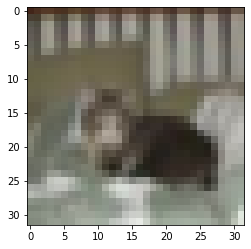

In [81]:
print("Image before Contrast and Horizontal Flip",plt.imshow(X_train[150]))

Image after Contrast and Horizontal Flip AxesImage(54,36;334.8x217.44)


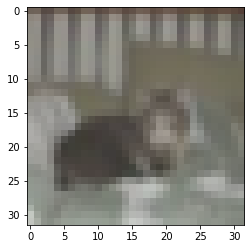

In [83]:
#Function for Contrast and Horizontal Flip
def CHFlip(image):
  alpha = np.random.uniform(0.5,2.0)
  image_n = np.zeros(image.shape, image.dtype)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      for c in range(image.shape[2]):
        image_n[i,j,c] = alpha*(image[i,j,c]-128) + 128
        image_n = np.clip(image_n, 0, 255)
  image_n = image_n[:, ::-1, :]
  return image_n

print("Image after Contrast and Horizontal Flip",plt.imshow(CHFlip(X_train[150])))

*3: Create the augmented training set using the transformation functions implemented in the previous part. Randomly select one of the four transformations for each image in the training set and apply it to that image.*

*Combine the transformed images with original training set to get the augmented training set.* 

*Note that the number of examples for the augmented training set will be twice that of the unaugmented training set. [10 marks]*

In [ ]:
#Randomly select Image Transformations done in Ques 2[a,b,c,d] and Generate a Augmented Training Dataset

T_m = [IE, PoI, Rotate, CHFlip]
T_i = []
print("Selecting Random Image Transformations and generating Transformed Images ")
for a in range(len(X_train)):
  temp = X_train[a]
  T_i.append(np.random.choice(T_m)(temp))

print("Generating Augmented Train Data")

T_i = np.array(T_i)
AugX_Train = np.concatenate((X_train, T_i))
AugY_train = np.concatenate((Y_train,Y_train))

print("Shape of Image Format Augmented Train Data:", AugX_Train.shape)
print("Shape of Lables for Augmented Train Data after One Hot Encoding:",AugY_train.shape)


*4: Use the feature extractor.py file provided with the assignment on the original (unaugmented) CIFAR-10 dataset and on the augmented dataset to get 1-dimensional input vectors.* 

*You can ignore the implementation of feature extractor.py and use it directly. [10 Marks]*

*Instructions for using feature-extractor.py:*

*• Refer to this page : https://pytorch.org/get-started/locally/ for installing the required dependencies of PyTorch. However, if you are using Google Colab or Kaggle for running your code then you do not need to install PyTorch there, as these environments supports PyTorch.*

*• The feature extractor.py accepts images of size (3×224×224) [Channel×Height×Width]. Use image processing libraries like PIL, CV2 to resize the CIFAR images from (3×32×32) to (3 × 224 × 224).*

*• Pass the resized images to feature extraction function of BBResNet18 class to generate feature vectors*

*• feature extraction: function expects each image is a numpy.ndarray of dtype: numpy.float32 and shape: [None, 3, 224, 224], where: None represents a variable size. It returns a numpy.ndarray of dtype: numpy.float32 and shape: [None, 512].*

In [ ]:
pip install opencv-python

In [ ]:
Need to get clarity


import feature_extractor as Feature


FM = fe.BBResNet18()
fv=[]
for i in range(len(X_train)//1000):
  batch = []
  for j in range(1000):
    batch.append(X_train[i])
  batch = np.copy(np.array(batch))
  re = np.copy(batch.astype('float32')/255)
  re = [cv2.resize(img,(224,224)) for img in re]
  re = np.copy(np.stack(re, axis=0))
  print(i)
  re = np.copy(re.transpose(0,3,1,2))
  fe_ext = FM.feature_extraction(re)
  fv.append(fe_ext)